### Effective Key Transition : Method 2B

- key position adjusted in increments of 0.25 mm
- note spectrum analysis used for effective opening / closing calibration
- key manipulated by mechanical device with **point finger**
- ~~infrared sensor used for key position error estimation~~

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import audacity

import FluteTransients as ftr

%matplotlib notebook

In [2]:
# Listing relevant datafiles
acquisitions = [0, 1, 2]
runnames = np.arange(300, 675, 25)
RUNS = 15
CHANNEL_CONFIG = (1, 3, 0, 2)

dfiles = []
for acq in acquisitions:
    dfiles.append([])
    for r, rn in enumerate(runnames):
        acqfiles = "DATA/MAIN_4500rpm/freqchange/cross/%d_%d.aup" % (rn, acq)
        dfiles[acq].append(acqfiles)

In [3]:
# Obtaining fourier specrtum data
data = []
for acqno, acqfiles in enumerate(dfiles):
    data.append([])
    for file in acqfiles:
        filedata = ftr.get_fsdata(file, *CHANNEL_CONFIG, nfft=2**15)
        data[acqno].append(filedata)

DATA/MAIN_4500rpm/freqchange/cross/300_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/325_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/350_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/375_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/400_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/425_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/450_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/475_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/500_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/525_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/550_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/575_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/600_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/625_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/650_0.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/300_1.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/325_1.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/350_1.aup
44100.0
DATA/MAIN_4500rpm/freqchange/cross/375_1.aup
4

<IPython.core.display.Javascript object>


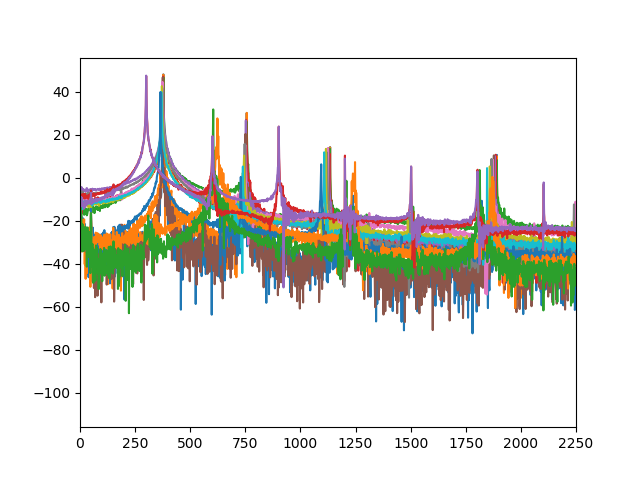

<IPython.core.display.Javascript object>


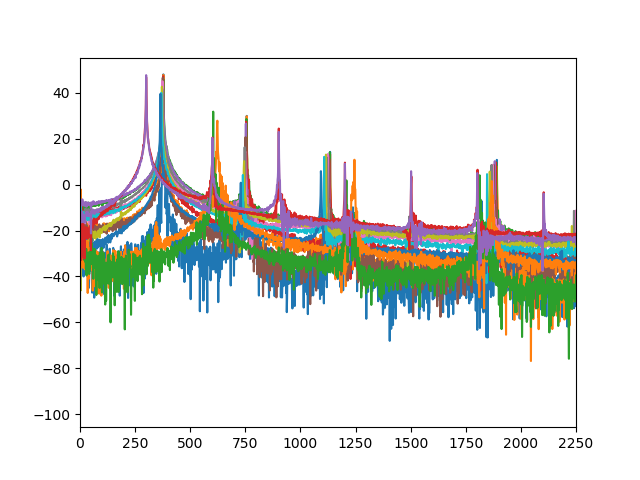

<IPython.core.display.Javascript object>


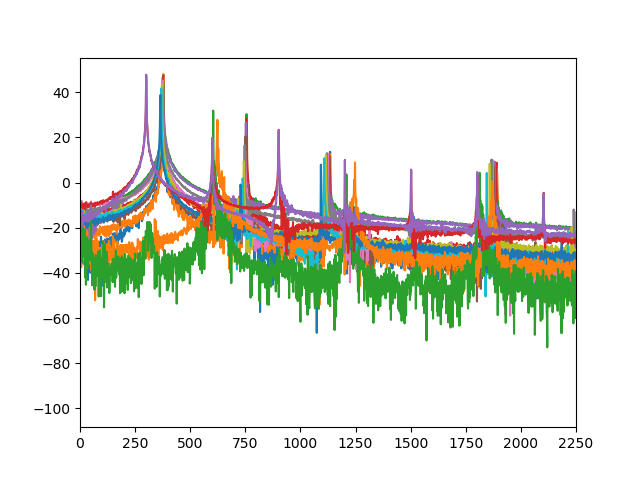

In [4]:
# Plotting fuurier spectra to find region of interest
for acqno, acqdata in enumerate(data):
    plt.figure()
    for rdata in acqdata:
        plt.plot(np.fft.rfftfreq(2**15, 1/44100), rdata['int_fs'])
        plt.xlim((0, 2250))

In [5]:
# Obtaining first harmonic data - internal mic
F0x = []
F0y = []
for acqno, acqdata in enumerate(data):
    F0x.append([])
    F0y.append([])
    for rdata in acqdata:
        f0x, f0y = ftr.get_f0(rdata['int_wf'], 200, 500, 2**15)
        F0x[acqno].append(f0x)
        F0y[acqno].append(f0y)

meanF0x = np.mean(F0x, axis=0)
stdevsF0x = ftr.get_stdevs(F0x, meanF0x)
meanF0y = np.mean(F0y, axis=0)
stdevsF0y = ftr.get_stdevs(F0y, meanF0y)

In [6]:
# Obtaining first harmonic data - labium mic
F0xlab = []
F0ylab = []
for acqno, acqdata in enumerate(data):
    F0xlab.append([])
    F0ylab.append([])
    for rdata in acqdata:
        f0x, f0y = ftr.get_f0(rdata['lab_wf'], 200, 500, 2**15)
        F0xlab[acqno].append(f0x)
        F0ylab[acqno].append(f0y)
        
meanF0xl = np.mean(F0xlab, axis=0)
stdevsF0xl = ftr.get_stdevs(F0xlab, meanF0xl)
meanF0yl = np.mean(F0ylab, axis=0)
stdevsF0yl = ftr.get_stdevs(F0ylab, meanF0yl)

In [7]:
# Obtaining first harmonic data - external mic
F0xext = []
F0yext = []
for acqno, acqdata in enumerate(data):
    F0xext.append([])
    F0yext.append([])
    for rdata in acqdata:
        f0x, f0y = ftr.get_f0(rdata['ext_wf'], 200, 500, 2**15)
        F0xext[acqno].append(f0x)
        F0yext[acqno].append(f0y)
        
meanF0xe = np.mean(F0xext, axis=0)
stdevsF0xe = ftr.get_stdevs(F0xext, meanF0xe)
meanF0ye = np.mean(F0yext, axis=0)
stdevsF0ye = ftr.get_stdevs(F0yext, meanF0ye)

<IPython.core.display.Javascript object>


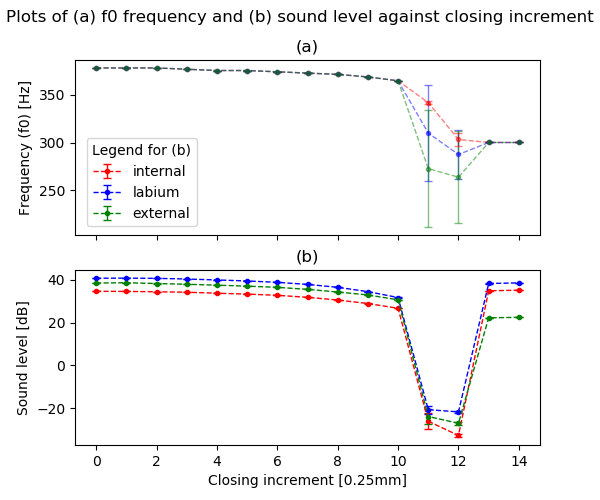

In [8]:
fig, ax = plt.subplots(2, sharex=True, figsize=(6, 5))
fig.suptitle('Plots of (a) f0 frequency and (b) sound level against closing increment')
ax[0].errorbar(np.arange(RUNS), meanF0x, yerr=stdevsF0x,
               ls='--', lw=1, marker='.', capsize=3, alpha=0.5, color='r', ecolor='r')
ax[1].errorbar(np.arange(RUNS), meanF0y, yerr=stdevsF0y,
               ls='--', lw=1, marker='.', capsize=3, color='r', ecolor='r', label='internal')
ax[0].errorbar(np.arange(RUNS), meanF0xl, yerr=stdevsF0xl,
               ls='--', lw=1, marker='.', capsize=3, alpha=0.5, color='b', ecolor='b')
ax[1].errorbar(np.arange(RUNS), meanF0yl, yerr=stdevsF0yl,
               ls='--', lw=1, marker='.', capsize=3, color='b', ecolor='b', label='labium')
ax[0].errorbar(np.arange(RUNS), meanF0xe, yerr=stdevsF0xe,
               ls='--', lw=1, marker='.', capsize=3, alpha=0.5, color='g', ecolor='g')
ax[1].errorbar(np.arange(RUNS), meanF0ye, yerr=stdevsF0ye,
               ls='--', lw=1, marker='.', capsize=3, color='g', ecolor='g', label='external')
ax[1].legend(loc=(0.025,1.25), title='Legend for (b)')
ax[0].set_title('(a)')
ax[1].set_title('(b)')
ax[0].set_ylabel('Frequency (f0) [Hz]')
ax[1].set_ylabel('Sound level [dB]')
ax[1].set_xlabel('Closing increment [0.25mm]')
# fig.savefig("F0_cross.png")